# Kısmi En küçük Kareler  Regresyonu

Partial least squares regression

* çok boyutluluk laneti
* çoklu doğrusal bağlantı problemi
* PLS de PCR gib ibağımsız değişkenlerin doğrusal kombinasyonlarını bulur
Bu doğrusal kombinasyonlar bileşen yada latent değişken olarak adlandırılır
* PLS NIPELS ın özel bir halidir, iteratif olarak bağımlı değişken ile
yüksek korolasyona sahip değişkenler arasındaki gizil(latent) ilişkiyi bulmaya çalışır 

* PCR da doğrusal kombinasyonlar yani bileşenşer *bağımsız değişken uzağındaki değişkneliği* 
maksimum şekilde özetleyecek şekilde oluşturulur
* Bu durum bağımlı değişkeni açıklma yeteneği olmamasına sebep olmakta
* PLS de ise *bileşenler bağımlı değişken ile olan kovaryansı* maksimumşekilde özetleyecek şekilde oşuşturulur
- yani hocam PCR değişkenlerde indirgeme yapar ancak bağımsız değişkenler arasında oluşturu bağımlı değişknele alakası yoktur
PLS ise bağımsız değişkenlerin bağımlı değişkene alakasına göre bir indirgeme yapar
- İşte bu yüzden değişknelre atılmak istenmiyorsa ve açıkklanabilirlik aranıyorsa PLS yoksa PCR kullanilir


# Model

In [56]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score

In [36]:
hit=pd.read_csv("Hitters.csv")
df=hit.copy()
df=df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 263 entries, 1 to 321
Data columns (total 20 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   AtBat      263 non-null    int64  
 1   Hits       263 non-null    int64  
 2   HmRun      263 non-null    int64  
 3   Runs       263 non-null    int64  
 4   RBI        263 non-null    int64  
 5   Walks      263 non-null    int64  
 6   Years      263 non-null    int64  
 7   CAtBat     263 non-null    int64  
 8   CHits      263 non-null    int64  
 9   CHmRun     263 non-null    int64  
 10  CRuns      263 non-null    int64  
 11  CRBI       263 non-null    int64  
 12  CWalks     263 non-null    int64  
 13  League     263 non-null    object 
 14  Division   263 non-null    object 
 15  PutOuts    263 non-null    int64  
 16  Assists    263 non-null    int64  
 17  Errors     263 non-null    int64  
 18  Salary     263 non-null    float64
 19  NewLeague  263 non-null    object 
dtypes: float64

In [37]:
ms=pd.get_dummies(df[["League","Division","NewLeague"]]) #kategorik değişkeni numeric yapma one hot

In [38]:
y=df["Salary"]#bağımlı değişkenş alma

In [39]:
X_=df.drop(["League","Division","NewLeague"],axis=1).astype("float64") #kategoric değişkenleri sildik
X=pd.concat([X_, ms[["League_N","Division_W","NewLeague_N"]]],axis=1)#dönüşüm yapılmıi halini ekledik

In [40]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X, y,test_size=0.25,random_state=42) # eğitim ve test kısmını ayırdık

In [41]:
# buraya kadar PCR ile aynı bildiğin data yükleme temel preprocession

In [42]:
from sklearn.cross_decomposition import PLSRegression, PLSSVD

In [43]:
pls=PLSRegression(n_components=2) #hocam buradaki bileşen sayısını kaç yaparsan yap çıkna katsayı yine baştaki değişken sayısı ile
#aynı olur 20 değişken varsa sen burada kaç ayarlarsan ayarla 20 katsayı çıkar. zaten çıkmazsa sorun olıur modeli kurucaz ee diyecek
#değişken sayıları uymuyor. yani bileşen sayısnın ayarlanması direkt değişken sayısını değiştirmek değildir
pls=pls.fit(X_train, y_train)

In [44]:
pls.coef_

/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/cross_decomposition/_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


array([[ 25.45057686],
       [ 46.47505695],
       [  1.80260672],
       [ 32.27092412],
       [ 15.76306129],
       [ 33.88440846],
       [ -5.69823422],
       [  5.25966139],
       [ 12.19848725],
       [ -2.97592451],
       [ 12.5495688 ],
       [  7.09918529],
       [  2.68988336],
       [ 69.76552578],
       [  6.2882987 ],
       [ -3.61667502],
       [250.2503734 ],
       [ 29.27819127],
       [-52.93108678],
       [ 22.99820122]])

# Tahmin

In [55]:
y_pred=pls.predict(X_train)
np.sqrt(mean_squared_error(y_train, y_pred))

172.80051763870995

In [57]:
r2_score(y_train,y_pred)

0.8491178238118008

In [58]:
y_pred_test=pls.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred_test))

212.0685363262962

# Tuning

In [70]:
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
import matplotlib.pylab as plt

In [62]:
cv_10=model_selection.KFold(n_splits=10, shuffle=True, random_state=1)

In [69]:
RMSE=[]
for i in np.arange(1,X_train.shape[1]+1):
    pls=PLSRegression(n_components=i)
    score=np.sqrt(-1*cross_val_score(pls, 
                                    X_train,
                                    y_train, 
                                    cv=cv_10,
                                    scoring="neg_mean_squared_error").mean())
    RMSE.append(score)

Text(0.5, 1.0, 'Salary')

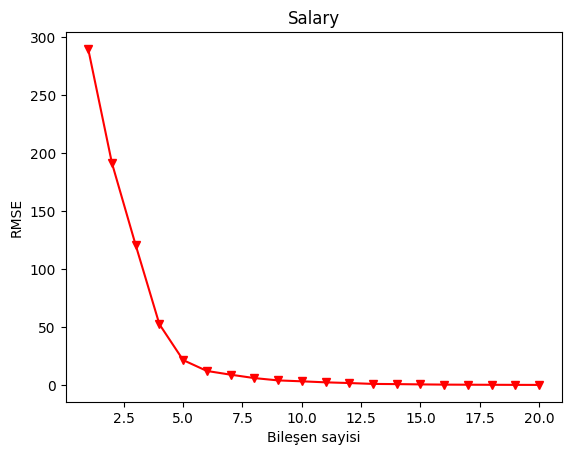

In [77]:
plt.plot(np.arange(1,X_train.shape[1]+1), np.array(RMSE),"-v", c="r") 
#plt.plot(RMSE,"-v")#bunu hoca yazmış aynı sayılır pek fark yok
plt.xlabel("Bileşen sayisi")
plt.ylabel("RMSE")
plt.title("Salary")

In [79]:
pls=PLSRegression(n_components=20).fit(X_train, y_train)
y_pred=pls.predict(X_train)
np.sqrt(mean_squared_error(y_pred, y_train)) #başta 172 çıkmıştı çok fark oldu

4.904592368400448e-13

In [82]:
y_pred_test=pls.predict(X_test)
np.sqrt(mean_squared_error(y_test,y_pred_test))

4.68795059055952e-13